In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"] = False


```text
와인데이터셋 이용
- train, test 나누기
- 정규화 하기
- 앙상블 이용하여 train,test (정확도,f1 score , confusion matrix)확인하기
- 부스팅 모델을 이용한 train,test (정확도,f1 score , confusion matrix)확인하기

iris 데이터 셋 이용
- 군집화 하기
- 정답과 군집화값 정확도 확인하기

### load_wine

In [2]:
wine = load_wine(as_frame=True)

In [3]:
x = wine.data
y = wine.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### voting

In [5]:
voting = VotingClassifier(
    [
        ("logi", LogisticRegression(max_iter=500)),
        ("tree", DecisionTreeClassifier()),
        ("knn", KNeighborsClassifier(n_neighbors=3)),
    ],
    voting="soft",
)

pipe = Pipeline([("scaler", StandardScaler()), ("voting", voting)])

pipe.fit(x_train, y_train)

,steps,"[('scaler', ...), ('voting', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimators,"[('logi', ...), ('tree', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None


In [7]:
vot_train_pred = pipe.predict(x_train)
vot_test_pred = pipe.predict(x_test)

print("정확도 :", accuracy_score(y_train, vot_train_pred), end=" / ")
print(accuracy_score(y_test, vot_test_pred))
print("정밀도 :", precision_score(y_train, vot_train_pred, average="macro"), end=" / ")
print(precision_score(y_test, vot_test_pred, average="macro"))
print("재현도 :", recall_score(y_train, vot_train_pred, average="macro"), end=" / ")
print(recall_score(y_test, vot_test_pred, average="macro"))
print("f1 :", f1_score(y_train, vot_train_pred, average="macro"), end=" / ")
print(f1_score(y_test, vot_test_pred, average="macro"))
print(confusion_matrix(y_train, vot_train_pred))
print(confusion_matrix(y_test, vot_test_pred))

정확도 : 1.0 / 1.0
정밀도 : 1.0 / 1.0
재현도 : 1.0 / 1.0
f1 : 1.0 / 1.0
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


### randomforest

In [7]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


정확도 : 1.0 / 1.0
정밀도 : 1.0 / 1.0
재현도 : 1.0 / 1.0
f1 : 1.0 / 1.0
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


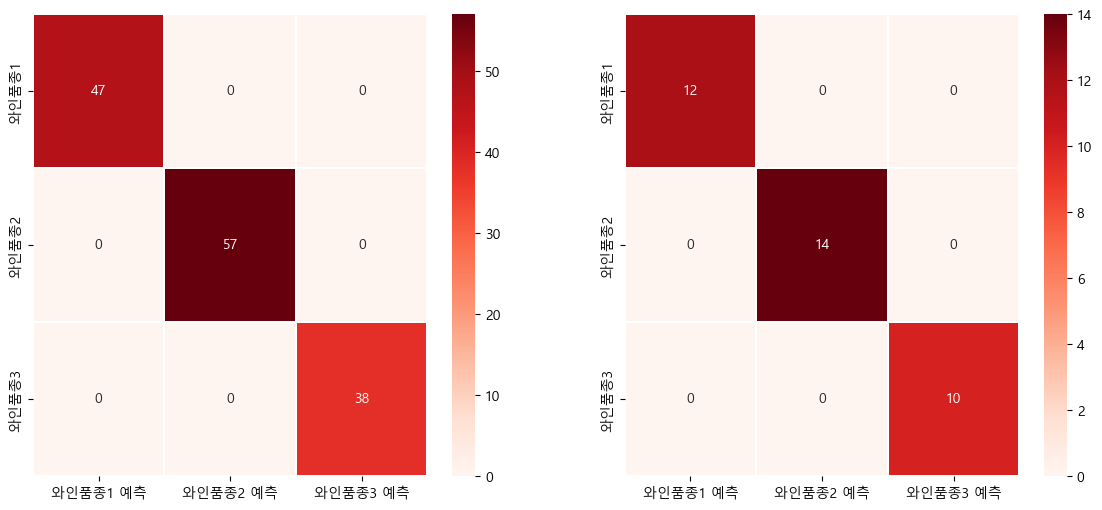

In [8]:
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print("정확도 :", accuracy_score(y_train, forest_train_pred), end=" / ")
print(accuracy_score(y_test, forest_test_pred))
print("정밀도 :", precision_score(y_train, forest_train_pred, average="macro"), end=" / ")
print(precision_score(y_test, forest_test_pred, average="macro"))
print("재현도 :", recall_score(y_train, forest_train_pred, average="macro"), end=" / ")
print(recall_score(y_test, forest_test_pred, average="macro"))
print("f1 :", f1_score(y_train, forest_train_pred, average="macro"), end=" / ")
print(f1_score(y_test, forest_test_pred, average="macro"))
print(confusion_matrix(y_train, forest_train_pred))
print(confusion_matrix(y_test, forest_test_pred))


c = confusion_matrix(y_train, forest_train_pred)
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )
c=confusion_matrix(y_test, forest_test_pred)
plt.subplot(1,2,2)
sns.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )

plt.show()

### boosting

In [16]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(x_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [11]:
lgb_train_pred = lgb.predict(x_train)
lgb_test_pred = lgb.predict(x_test)

print("정확도 :", accuracy_score(y_train, lgb_train_pred), end=" / ")
print(accuracy_score(y_test, lgb_test_pred))
print("정밀도 :", precision_score(y_train, lgb_train_pred, average="macro"), end=" / ")
print(precision_score(y_test, lgb_test_pred, average="macro"))
print("재현도 :", recall_score(y_train, lgb_train_pred, average="macro"), end=" / ")
print(recall_score(y_test, lgb_test_pred, average="macro"))
print("f1 :", f1_score(y_train, lgb_train_pred, average="macro"), end=" / ")
print(f1_score(y_test, lgb_test_pred, average="macro"))
print(confusion_matrix(y_train, lgb_train_pred))
print(confusion_matrix(y_test, lgb_test_pred))

정확도 : 1.0 / 1.0
정밀도 : 1.0 / 1.0
재현도 : 1.0 / 1.0
f1 : 1.0 / 1.0
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


In [12]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
xgb_train_pred = xgb.predict(x_train)
xgb_test_pred = xgb.predict(x_test)

print("정확도 :", accuracy_score(y_train, xgb_train_pred), end=" / ")
print(accuracy_score(y_test, xgb_test_pred))
print("정밀도 :", precision_score(y_train, xgb_train_pred, average="macro"), end=" / ")
print(precision_score(y_test, xgb_test_pred, average="macro"))
print("재현도 :", recall_score(y_train, xgb_train_pred, average="macro"), end=" / ")
print(recall_score(y_test, xgb_test_pred, average="macro"))
print("f1 :", f1_score(y_train, xgb_train_pred, average="macro"), end=" / ")
print(f1_score(y_test, xgb_test_pred, average="macro"))
print(confusion_matrix(y_train, xgb_train_pred))
print(confusion_matrix(y_test, xgb_test_pred))

정확도 : 1.0 / 0.9722222222222222
정밀도 : 1.0 / 0.9743589743589745
재현도 : 1.0 / 0.9761904761904763
f1 : 1.0 / 0.974320987654321
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


In [14]:
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(x_train, y_train)

In [17]:
cat_train_pred = cat.predict(x_train)
cat_test_pred = cat.predict(x_test)

print("정확도 :", accuracy_score(y_train, cat_train_pred), end=" / ")
print(accuracy_score(y_test, cat_test_pred))
print("정밀도 :", precision_score(y_train, cat_train_pred, average="macro"), end=" / ")
print(precision_score(y_test, cat_test_pred, average="macro"))
print("재현도 :", recall_score(y_train, cat_train_pred, average="macro"), end=" / ")
print(recall_score(y_test, cat_test_pred, average="macro"))
print("f1 :", f1_score(y_train, cat_train_pred, average="macro"), end=" / ")
print(f1_score(y_test, cat_test_pred, average="macro"))
print(confusion_matrix(y_train, cat_train_pred))
print(confusion_matrix(y_test, cat_test_pred))

정확도 : 1.0 / 1.0
정밀도 : 1.0 / 1.0
재현도 : 1.0 / 1.0
f1 : 1.0 / 1.0
[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


### load_iris

In [101]:
iris = load_iris(as_frame=True)
df = iris.frame

### kmeans

In [103]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_fit = kmeans.fit(df.values)


In [96]:
kmeans_fit.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [104]:
df["cluster"] = kmeans_fit.labels_

In [105]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


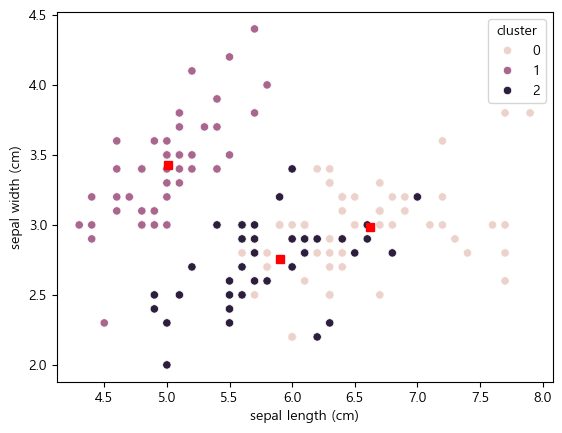

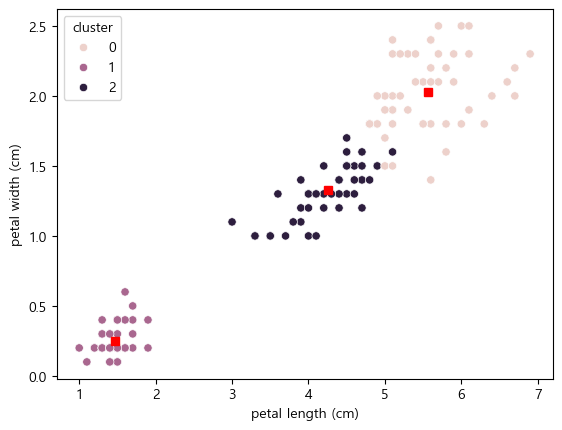

In [106]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="cluster")
for x, y in kmeans_fit.cluster_centers_[:, :2]:
    plt.plot(x, y, "rs")
plt.show()
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="cluster")
for x, y in kmeans_fit.cluster_centers_[:, 2:4]:
    plt.plot(x, y, "rs")
plt.show()

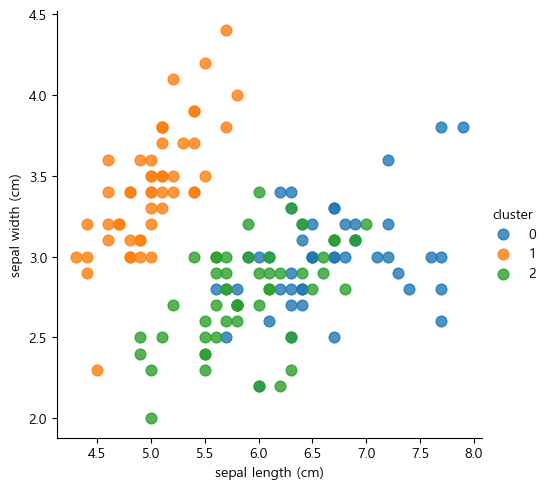

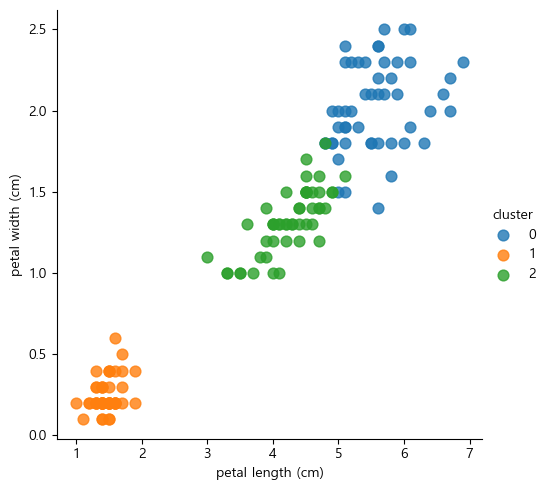

In [107]:
sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=df, hue="cluster", fit_reg=False, scatter_kws={"s": 60})
sns.lmplot(x="petal length (cm)", y="petal width (cm)", data=df, hue="cluster", fit_reg=False, scatter_kws={"s": 60})
plt.show()